## Genderdata

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from imblearn.under_sampling import NearMiss
df = pd.read_csv('../data/session_train_data.csv')
print df.shape

(8981, 378)


In [2]:
genders_count = df.groupby(['gender']).count()
genders_count

id  date_account_created  timestamp_first_active   age  \
gender                                                                
-unknown-  4460                  4460                    4460   778   
FEMALE     2371                  2371                    2371  2256   
MALE       2140                  2140                    2140  2036   
OTHER        10                    10                      10     9   

           signup_method  signup_flow  language  affiliate_channel  \
gender                                                               
-unknown-           4460         4460      4460               4460   
FEMALE              2371         2371      2371               2371   
MALE                2140         2140      2140               2140   
OTHER                 10           10        10                 10   

           affiliate_provider  first_affiliate_tracked        ...         \
gender                                                        ...          
-unknown-                4460                     4436        ...          
FEMALE                   2371                     2357        ...          
MALE                     2140                     2116        ...          
OTHER                      10                       10        ...          

           device_type_Windows Desktop  device_type_Windows Phone  \
gender                                                              
-unknown-                         4460                       4460   
FEMALE                            2371                       2371   
MALE                              2140                       2140   
OTHER                               10                         10   

           device_type_iPad Tablet  device_type_iPhone  device_type_iPodtouch  \
gender                                                                          
-unknown-                     4460                4460                   4460   
FEMALE                        2371                2371                   2371   
MALE                          2140                2140                   2140   
OTHER                           10                  10                     10   

           secs_elapsed_max  secs_elapsed_mean  secs_elapsed_min  \
gender                                                             
-unknown-              4460               4460              4460   
FEMALE                 2371               2371              2371   
MALE                   2140               2140              2140   
OTHER                    10                 10                10   

           secs_elapsed_std  secs_elapsed_sum  
gender                                         
-unknown-              4460              4460  
FEMALE                 2371              2371  
MALE                   2140              2140  
OTHER                    10                10  

[4 rows x 377 columns]

In [3]:
# replace all unknown data with non
df.replace('-unknown-', np.nan, inplace=True)

df = df.dropna()
#drop all nan data

df.shape

(3876, 378)

In [4]:
df.age.describe()

count    3876.000000
mean       42.558308
std       110.717827
min        15.000000
25%        27.000000
50%        32.000000
75%        42.000000
max      2014.000000
Name: age, dtype: float64

std 155, min 1, max 2014. must be some wrong data
#found some ages are unusualnlikely to traveal.
1. age >= 1924, there are some typos. people put date of birth to age
2. some ages > 100 or < 17 can't to u

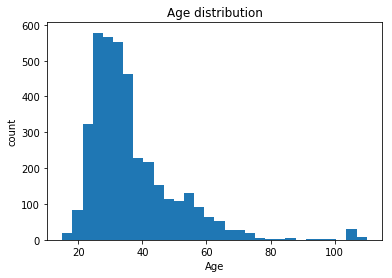

(3864, 378)

In [5]:
#fill all unsual ages to nan
df = df.loc[df['age']<120]
df = df.loc[df['age']>12]
plt.hist(df.age.dropna(),bins =30) 
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel("count")
plt.show()
df.shape

Found population around age 30 is signifgent higher than others

# Plot gender features with other feature to get insight for feature selection

In [6]:
df.head(3)

id date_account_created  timestamp_first_active  gender   age  \
1  009a40t3dk               7/2/14            2.010000e+13    MALE  33.0   
2  00fn6wu77e              29/1/14            2.010000e+13  FEMALE  27.0   
4  00v0o06skl              31/1/14            2.010000e+13  FEMALE  52.0   

  signup_method  signup_flow language affiliate_channel affiliate_provider  \
1         basic            0       en            direct             direct   
2      facebook            0       de            direct             direct   
4         basic            0       en            direct             direct   

         ...        device_type_Windows Desktop device_type_Windows Phone  \
1        ...                                 21                         3   
2        ...                                 17                         0   
4        ...                                 14                         0   

  device_type_iPad Tablet device_type_iPhone device_type_iPodtouch  \
1                     391                  3                   224   
2                      69                  6                   224   
4                      96                  5                   224   

   secs_elapsed_max  secs_elapsed_mean  secs_elapsed_min  secs_elapsed_std  \
1           1028988        83171.96000                 0      220909.84420   
2           1170083        75063.91429                 4      254497.48610   
4            332395        15132.40367                 0       39153.45133   

   secs_elapsed_sum  
1           2079299  
2           2627237  
4           3298864  

[3 rows x 378 columns]

## Plot gender


In [7]:
genders_count = df.groupby(['gender']).count()
genders_count


id  date_account_created  timestamp_first_active   age  \
gender                                                             
FEMALE  2060                  2060                    2060  2060   
MALE    1795                  1795                    1795  1795   
OTHER      9                     9                       9     9   

        signup_method  signup_flow  language  affiliate_channel  \
gender                                                            
FEMALE           2060         2060      2060               2060   
MALE             1795         1795      1795               1795   
OTHER               9            9         9                  9   

        affiliate_provider  first_affiliate_tracked        ...         \
gender                                                     ...          
FEMALE                2060                     2060        ...          
MALE                  1795                     1795        ...          
OTHER                    9                        9        ...          

        device_type_Windows Desktop  device_type_Windows Phone  \
gender                                                           
FEMALE                         2060                       2060   
MALE                           1795                       1795   
OTHER                             9                          9   

        device_type_iPad Tablet  device_type_iPhone  device_type_iPodtouch  \
gender                                                                       
FEMALE                     2060                2060                   2060   
MALE                       1795                1795                   1795   
OTHER                         9                   9                      9   

        secs_elapsed_max  secs_elapsed_mean  secs_elapsed_min  \
gender                                                          
FEMALE              2060               2060              2060   
MALE                1795               1795              1795   
OTHER                  9                  9                 9   

        secs_elapsed_std  secs_elapsed_sum  
gender                                      
FEMALE              2060              2060  
MALE                1795              1795  
OTHER                  9                 9  

[3 rows x 377 columns]

## plot gender with age


In [255]:
import matplotlib.pyplot as plt
#df_gs = pd.concat([df.gender, df.age],axis=1)
df_gs = pd.concat([df.gender, df.age, df.id],axis=1)

Generated a grouped dataframe with the counts of each M and F per age

In [256]:
age_counts = df_gs.groupby(['age','gender']).count()

In [257]:
age_counts

id
age   gender      
15.0  FEMALE     1
      MALE       4
16.0  FEMALE    14
      MALE       6
17.0  FEMALE    36
      MALE      15
      OTHER      1
18.0  FEMALE   201
      MALE     126
      OTHER      2
19.0  FEMALE   368
      MALE     198
      OTHER      7
20.0  FEMALE   238
      MALE     177
      OTHER      1
21.0  FEMALE   490
      MALE     283
      OTHER      2
22.0  FEMALE   819
      MALE     537
      OTHER      4
23.0  FEMALE  1217
      MALE     741
      OTHER      1
24.0  FEMALE  1555
      MALE     952
      OTHER      1
25.0  FEMALE  2103
      MALE    1416
...            ...
95.0  FEMALE    23
      MALE      21
96.0  FEMALE     5
      MALE      16
97.0  FEMALE     7
      MALE       2
98.0  FEMALE     8
      MALE       6
99.0  FEMALE     8
      MALE       6
100.0 FEMALE    14
      MALE       8
101.0 FEMALE    13
      MALE       6
102.0 FEMALE    17
      MALE      13
103.0 FEMALE    12
      MALE      11
104.0 FEMALE    23
      MALE      14
105.0 FEMALE   253
      MALE     237
106.0 FEMALE     6
      MALE       9
107.0 FEMALE    13
      MALE      10
108.0 FEMALE     6
      MALE       8
109.0 FEMALE    12
      MALE      14

[237 rows x 1 columns]

calculate the total number of individual per age group:

gender count

In [258]:
# df = df.drop(df.query("age == 30 and gender == \'FEMALE\'").sample(frac=.9).index)

In [259]:
age_counts = df.groupby(['age','gender']).count()
print age_counts

                id  date_account_created  timestamp_first_active  \
age   gender                                                       
15.0  FEMALE     1                     1                       1   
      MALE       4                     4                       4   
16.0  FEMALE    14                    14                      14   
      MALE       6                     6                       6   
17.0  FEMALE    36                    36                      36   
      MALE      15                    15                      15   
      OTHER      1                     1                       1   
18.0  FEMALE   201                   201                     201   
      MALE     126                   126                     126   
      OTHER      2                     2                       2   
19.0  FEMALE   368                   368                     368   
      MALE     198                   198                     198   
      OTHER      7                     7        

In [260]:
gender_counts = df.groupby(['gender']).count()
print gender_counts

           id  date_account_created  timestamp_first_active    age  \
gender                                                               
FEMALE  52286                 52286                   52286  52286   
MALE    44623                 44623                   44623  44623   
OTHER     206                   206                     206    206   

        signup_method  signup_flow  language  affiliate_channel  \
gender                                                            
FEMALE          52286        52286     52286              52286   
MALE            44623        44623     44623              44623   
OTHER             206          206       206                206   

        affiliate_provider  first_affiliate_tracked  signup_app  \
gender                                                            
FEMALE               52286                    52286       52286   
MALE                 44623                    44623       44623   
OTHER                  206                   

Under-sampling all womens

## plot gender with sign-up method

In [261]:
df_sm = pd.concat([df.gender, df.signup_method, df.id],axis=1)
sm_counts = df_sm.groupby(['signup_method','gender']).count()

calculate the total number of individual per age group:

In [262]:
sm_totals = sm_counts.sum(level=0)
print sm_totals

                  id
signup_method       
basic          46894
facebook       50215
google             6


To prepare for plotting, I'll transform my counts dataframe to separate each sex by columns, instead of by index.

In [263]:
sm_counts = sm_counts.unstack(level=1)
sm_counts.columns = sm_counts.columns.droplevel(level=0)
print sm_counts

gender          FEMALE     MALE  OTHER
signup_method                         
basic          26009.0  20724.0  161.0
facebook       26276.0  23894.0   45.0
google             1.0      5.0    NaN


replace the NaN by 0.

In [264]:
sm_counts = sm_counts.fillna(0)


['basic' 'facebook' 'google']


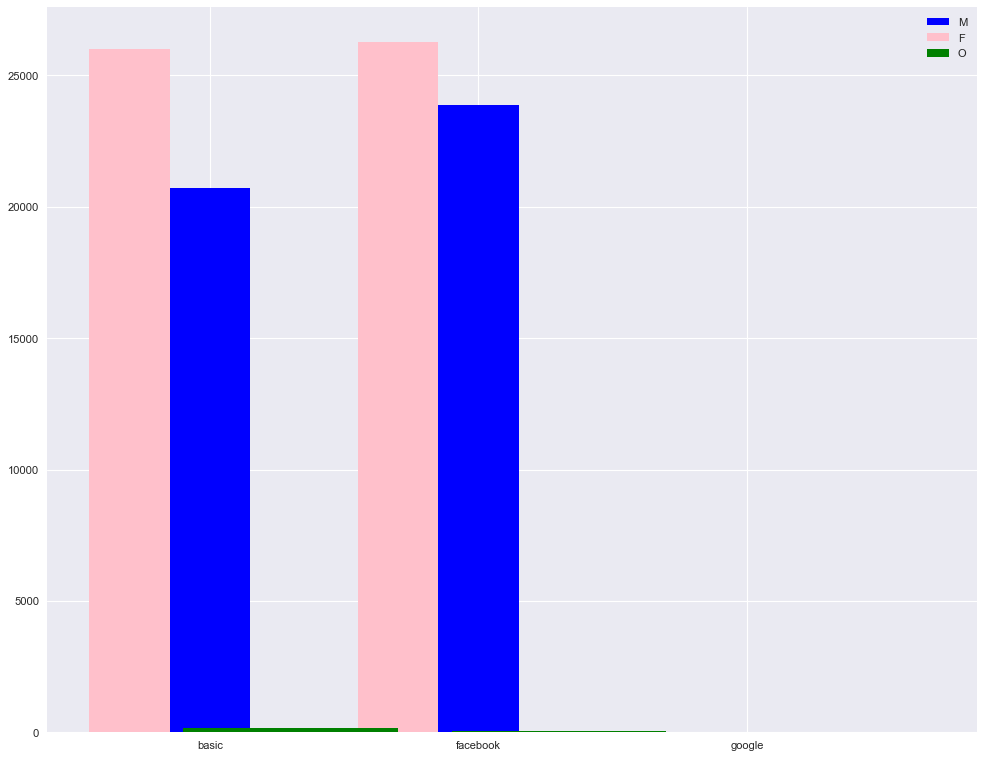

In [265]:

sm = sm_counts.index.tolist()
# turn it to np array so 
sm = np.asarray(sm)

print sm

x_index = np.asarray([1,2,3])
width = 0.3
fig = plt.figure(num=None, figsize=(15, 12), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
rects1 = ax.bar(x_index, sm_counts['MALE'],width, color='blue', label='M')
rects2 = ax.bar(x_index-width, sm_counts['FEMALE'],width,color='pink', label='F')
rects3 = ax.bar(x_index+width, sm_counts['OTHER'], color='green', label='O')

plt.xticks(x_index, sm)
ax.legend()
plt.show()

basic sighn-up 女生更多， facebook signup 几乎对半
signup method can be use as a feature.

## plot gender with signup_flow

In [169]:
df_sf = pd.concat([df.gender, df.signup_flow, df.id],axis=1)
sf_counts = df_sf.groupby(['signup_flow','gender']).count()

calculate the total number of individual per age group:

In [170]:
sf_totals = sf_counts.sum(level=0)
print sf_totals

                id
signup_flow       
0            84146
1              466
2             3019
3             4325
4                1
5               26
6               88
8              120
10               1
12            2451
15               3
16               9
20               5
21             189
23              84
24            1004
25            1178


To prepare for plotting, I'll transform my counts dataframe to separate each sex by columns, instead of by index.

In [171]:
sf_counts = sf_counts.unstack(level=1)
sf_counts.columns = sf_counts.columns.droplevel(level=0)
print sf_counts

gender        FEMALE     MALE  OTHER
signup_flow                         
0            45418.0  38555.0  173.0
1              256.0    206.0    4.0
2             1666.0   1342.0   11.0
3             2302.0   2013.0   10.0
4                NaN      1.0    NaN
5               17.0      9.0    NaN
6               42.0     46.0    NaN
8               59.0     61.0    NaN
10               1.0      NaN    NaN
12            1144.0   1305.0    2.0
15               2.0      1.0    NaN
16               4.0      5.0    NaN
20               3.0      2.0    NaN
21             121.0     68.0    NaN
23              32.0     52.0    NaN
24             632.0    369.0    3.0
25             587.0    588.0    3.0


replace the NaN by 0.

In [172]:
sm_counts = sm_counts.fillna(0)


insight: at age 30, weman are much more than man. age 30 can be a out liner?????

[ 0  1  2  3  4  5  6  8 10 12 15 16 20 21 23 24 25]


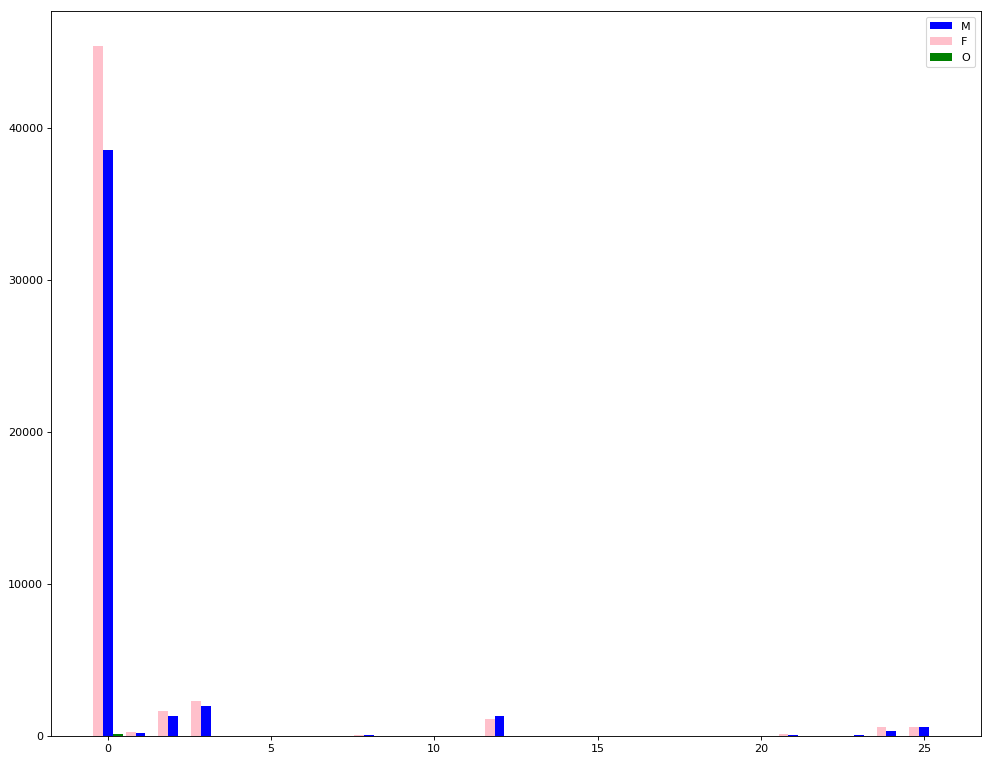

In [173]:
# age_counts.drop(30, inplace=True)
sf = sf_counts.index.tolist()
# turn it to np array so 
sf = np.asarray(sf)

print sf

width = 0.3
fig = plt.figure(num=None, figsize=(15, 12), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
rects1 = ax.bar(sf, sf_counts['MALE'],width, color='blue', label='M')
rects2 = ax.bar(sf-width, sf_counts['FEMALE'],width,color='pink', label='F')
rects3 = ax.bar(sf+width, sf_counts['OTHER'],width, color='green', label='O')

ax.legend()
plt.show()

signup-flow can be use as a feature.

## plot gender with affiliate_channel

In [174]:
df_ac = pd.concat([df.gender, df.affiliate_channel, df.id],axis=1)
ac_counts = df_ac.groupby(['affiliate_channel','gender']).count()

calculate the total number of individual per age group:

In [175]:
ac_totals = ac_counts.sum(level=0)
print ac_totals

                      id
affiliate_channel       
api                 2386
content             1864
direct             61845
other               4636
remarketing          528
sem-brand          12930
sem-non-brand       8386
seo                 4540


To prepare for plotting, I'll transform my counts dataframe to separate each sex by columns, instead of by index.

In [176]:
ac_counts = ac_counts.unstack(level=1)
ac_counts.columns = ac_counts.columns.droplevel(level=0)
print ac_counts

gender              FEMALE     MALE  OTHER
affiliate_channel                         
api                 1116.0   1268.0    2.0
content             1170.0    692.0    2.0
direct             32325.0  29388.0  132.0
other               2492.0   2132.0   12.0
remarketing          337.0    191.0    NaN
sem-brand           7365.0   5534.0   31.0
sem-non-brand       5054.0   3312.0   20.0
seo                 2427.0   2106.0    7.0


replace the NaN by 0.

In [177]:
ac_counts = ac_counts.fillna(0)


insight: at age 30, weman are much more than man. age 30 can be a out liner?????

['api' 'content' 'direct' 'other' 'remarketing' 'sem-brand' 'sem-non-brand'
 'seo']


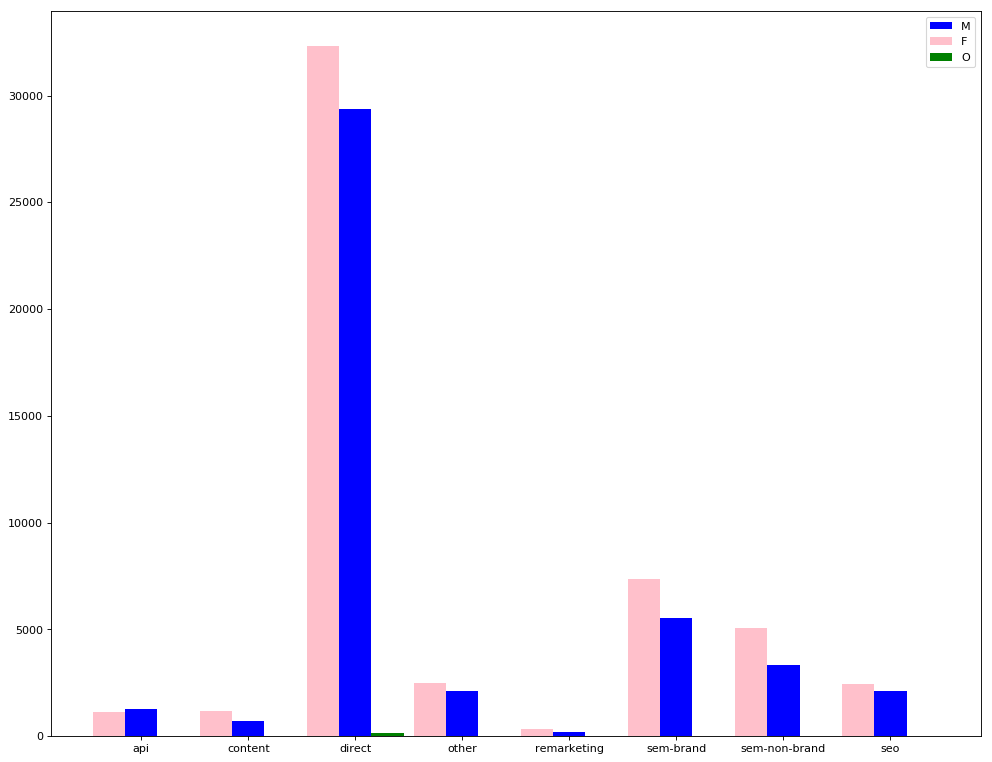

In [178]:
# age_counts.drop(30, inplace=True)
ac = ac_counts.index.tolist()
# turn it to np array so 
ac = np.asarray(ac)
x_index = np.asarray([1,2,3,4,5,6,7,8])

print ac

width = 0.3
fig = plt.figure(num=None, figsize=(15, 12), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
rects1 = ax.bar(x_index, ac_counts['MALE'],width, color='blue', label='M')
rects2 = ax.bar(x_index-width, ac_counts['FEMALE'],width,color='pink', label='F')
rects3 = ax.bar(x_index+width, ac_counts['OTHER'],width, color='green', label='O')

plt.xticks(x_index, ac)
ax.legend()
plt.show()

affliated channel can be use as a feature.

## plot gender with affiliate_provider

In [179]:
df_ap = pd.concat([df.gender, df.affiliate_provider, df.id],axis=1)
ap_counts = df_ap.groupby(['affiliate_provider','gender']).count()

calculate the total number of individual per age group:

In [180]:
ap_totals = ap_counts.sum(level=0)
print ap_totals

                        id
affiliate_provider        
baidu                   13
bing                  1003
craigslist            1668
direct               61757
email-marketing         59
facebook              1439
facebook-open-graph    388
google               24825
gsp                    171
meetup                 126
naver                   23
other                 4704
padmapper              406
vast                   297
wayn                     3
yahoo                  220
yandex                  13


To prepare for plotting, I'll transform my counts dataframe to separate each sex by columns, instead of by index.

In [181]:
ap_counts = ap_counts.unstack(level=1)
ap_counts.columns = ap_counts.columns.droplevel(level=0)
print ap_counts

gender                FEMALE     MALE  OTHER
affiliate_provider                          
baidu                    6.0      7.0    NaN
bing                   638.0    364.0    1.0
craigslist             903.0    761.0    4.0
direct               32283.0  29342.0  132.0
email-marketing         33.0     26.0    NaN
facebook               769.0    667.0    3.0
facebook-open-graph    246.0    141.0    1.0
google               14394.0  10377.0   54.0
gsp                     83.0     88.0    NaN
meetup                  69.0     57.0    NaN
naver                   11.0     12.0    NaN
other                 2379.0   2316.0    9.0
padmapper              162.0    244.0    NaN
vast                   176.0    119.0    2.0
wayn                     NaN      3.0    NaN
yahoo                  126.0     94.0    NaN
yandex                   8.0      5.0    NaN


replace the NaN by 0.

In [182]:
ap_counts = ap_counts.fillna(0)


insight: at age 30, weman are much more than man. age 30 can be a out liner?????

['api' 'content' 'direct' 'other' 'remarketing' 'sem-brand' 'sem-non-brand'
 'seo']


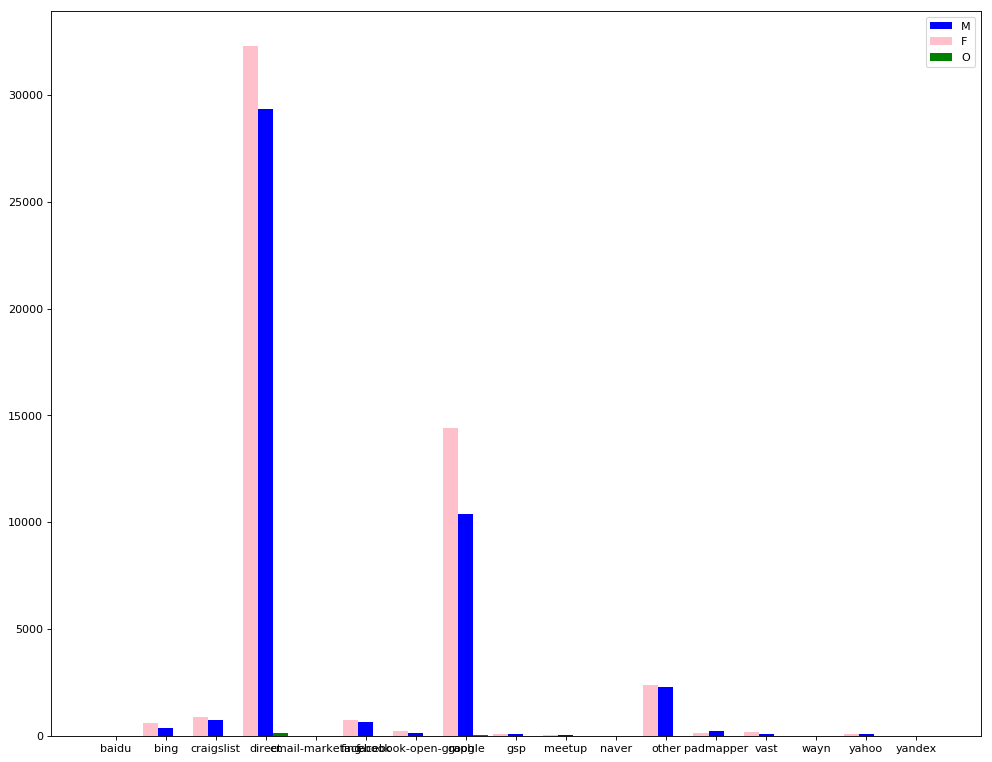

In [183]:
# age_counts.drop(30, inplace=True)
ap = ap_counts.index.tolist()
# turn it to np array so 
ap = np.asarray(ap)
x_index = np.asarray([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])

print ac

width = 0.3
fig = plt.figure(num=None, figsize=(15, 12), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
rects1 = ax.bar(x_index, ap_counts['MALE'],width, color='blue', label='M')
rects2 = ax.bar(x_index-width, ap_counts['FEMALE'],width,color='pink', label='F')
rects3 = ax.bar(x_index+width, ap_counts['OTHER'],width, color='green', label='O')

plt.xticks(x_index, ap)
ax.legend()
plt.show()

## plot gender with first_affiliate_tracked

In [184]:
df_fat = pd.concat([df.gender, df.first_affiliate_tracked, df.id],axis=1)
fat_counts = df_fat.groupby(['first_affiliate_tracked','gender']).count()

calculate the total number of individual per age group:

In [185]:
fat_totals = fat_counts.sum(level=0)
print fat_totals

                            id
first_affiliate_tracked       
linked                   24548
local ops                   25
marketing                   91
omg                      21618
product                    707
tracked-other             3434
untracked                46692


To prepare for plotting, I'll transform my counts dataframe to separate each sex by columns, instead of by index.

In [186]:
fat_counts = fat_counts.unstack(level=1)
fat_counts.columns = fat_counts.columns.droplevel(level=0)
print fat_counts

gender                    FEMALE     MALE  OTHER
first_affiliate_tracked                         
linked                   13530.0  10970.0   48.0
local ops                   13.0     12.0    NaN
marketing                   51.0     40.0    NaN
omg                      12504.0   9067.0   47.0
product                    368.0    338.0    1.0
tracked-other             1869.0   1561.0    4.0
untracked                23951.0  22635.0  106.0


replace the NaN by 0.

In [187]:
fat_counts = fat_counts.fillna(0)


insight: at age 30, weman are much more than man. age 30 can be a out liner?????

['linked' 'local ops' 'marketing' 'omg' 'product' 'tracked-other'
 'untracked']


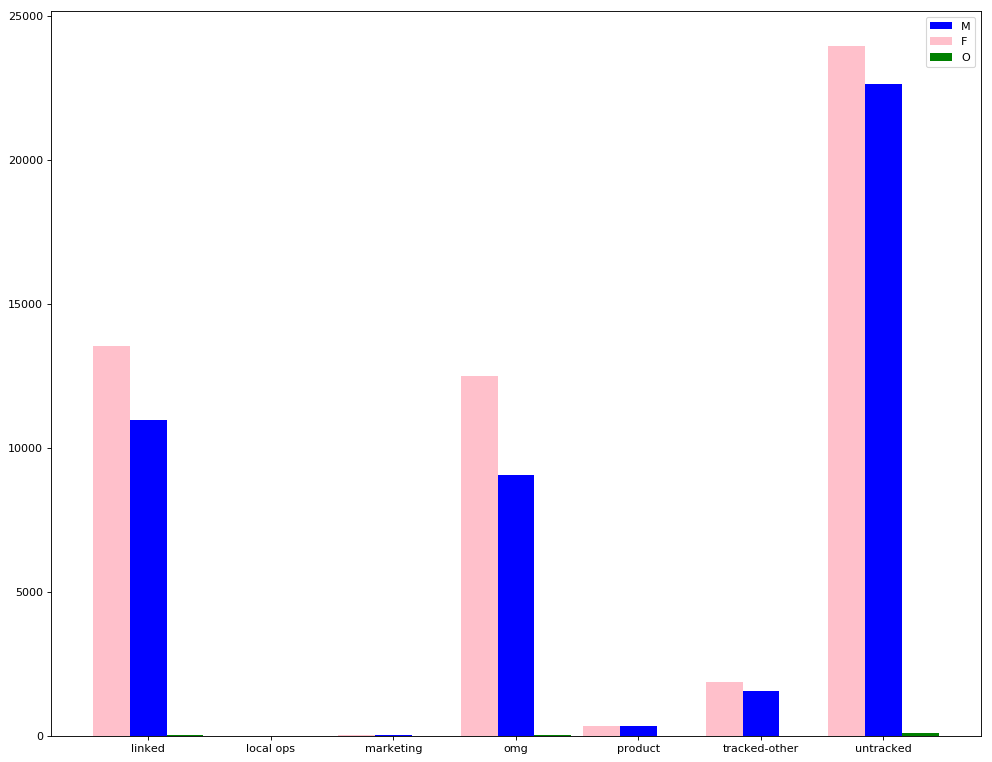

In [188]:
# age_counts.drop(30, inplace=True)
fat = fat_counts.index.tolist()
# turn it to np array so 
fat = np.asarray(fat)
x_index = np.asarray([1,2,3,4,5,6,7])

print fat

width = 0.3
fig = plt.figure(num=None, figsize=(15, 12), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
rects1 = ax.bar(x_index, fat_counts['MALE'],width, color='blue', label='M')
rects2 = ax.bar(x_index-width, fat_counts['FEMALE'],width,color='pink', label='F')
rects3 = ax.bar(x_index+width, fat_counts['OTHER'],width, color='green', label='O')

plt.xticks(x_index, fat)
ax.legend()
plt.show()

signup-flow can be use as a feature. Too many data is untracked, first_affiliate might not be useful

## plot gender with signup_app

In [189]:
df_su = pd.concat([df.gender, df.signup_app, df.id],axis=1)
su_counts = df_su.groupby(['signup_app','gender']).count()

calculate the total number of individual per age group:

In [190]:
su_totals = su_counts.sum(level=0)
print su_totals

               id
signup_app       
Android       187
Moweb        1670
Web         92482
iOS          2776


To prepare for plotting, I'll transform my counts dataframe to separate each sex by columns, instead of by index.

In [191]:
su_counts = su_counts.unstack(level=1)
su_counts.columns = su_counts.columns.droplevel(level=0)
print su_counts

gender       FEMALE     MALE  OTHER
signup_app                         
Android        71.0    116.0    NaN
Moweb        1033.0    635.0    2.0
Web         49926.0  42355.0  201.0
iOS          1256.0   1517.0    3.0


replace the NaN by 0.

In [192]:
su_counts = su_counts.fillna(0)


insight: at age 30, weman are much more than man. age 30 can be a out liner?????

['Android' 'Moweb' 'Web' 'iOS']


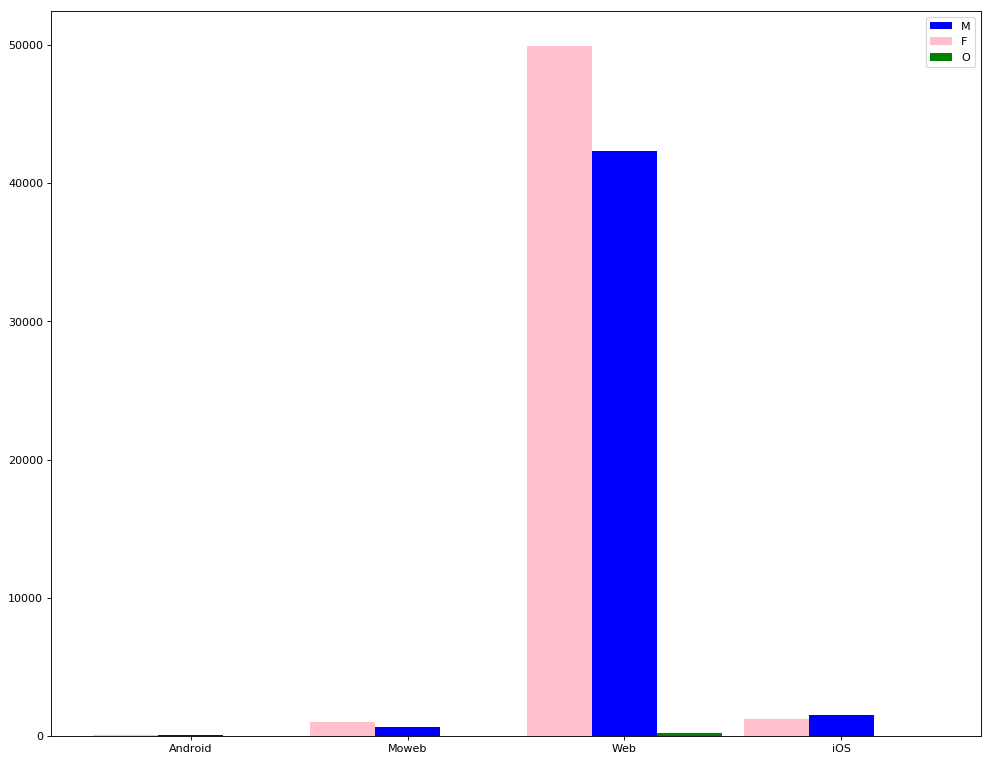

In [193]:
# age_counts.drop(30, inplace=True)
su = su_counts.index.tolist()
# turn it to np array so 
su = np.asarray(su)
x_index = np.asarray([1,2,3,4])

print su

width = 0.3
fig = plt.figure(num=None, figsize=(15, 12), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
rects1 = ax.bar(x_index, su_counts['MALE'],width, color='blue', label='M')
rects2 = ax.bar(x_index-width, su_counts['FEMALE'],width,color='pink', label='F')
rects3 = ax.bar(x_index+width, su_counts['OTHER'],width, color='green', label='O')

plt.xticks(x_index, su)
ax.legend()
plt.show()

Can be useful

## plot gender with first_device_type

In [194]:
df_fdt = pd.concat([df.gender, df.first_device_type, df.id],axis=1)
fdt_counts = df_fdt.groupby(['first_device_type','gender']).count()

calculate the total number of individual per age group:

In [195]:
fdt_totals = fdt_counts.sum(level=0)
print fdt_totals

                       id
first_device_type        
Android Phone         599
Android Tablet        483
Desktop (Other)       637
Mac Desktop         50195
Other/Unknown          44
SmartPhone (Other)     36
Windows Desktop     36011
iPad                 6176
iPhone               2934


To prepare for plotting, I'll transform my counts dataframe to separate each sex by columns, instead of by index.

In [196]:
fdt_counts = fdt_counts.unstack(level=1)
fdt_counts.columns = fdt_counts.columns.droplevel(level=0)
print fdt_counts

gender               FEMALE     MALE  OTHER
first_device_type                          
Android Phone         313.0    285.0    1.0
Android Tablet        275.0    208.0    NaN
Desktop (Other)       236.0    399.0    2.0
Mac Desktop         27209.0  22867.0  119.0
Other/Unknown          28.0     16.0    NaN
SmartPhone (Other)     24.0     12.0    NaN
Windows Desktop     18655.0  17286.0   70.0
iPad                 3828.0   2341.0    7.0
iPhone               1718.0   1209.0    7.0


replace the NaN by 0.

In [197]:
fdt_counts = fdt_counts.fillna(0)


insight: at age 30, weman are much more than man. age 30 can be a out liner?????

['Android Phone' 'Android Tablet' 'Desktop (Other)' 'Mac Desktop'
 'Other/Unknown' 'SmartPhone (Other)' 'Windows Desktop' 'iPad' 'iPhone']


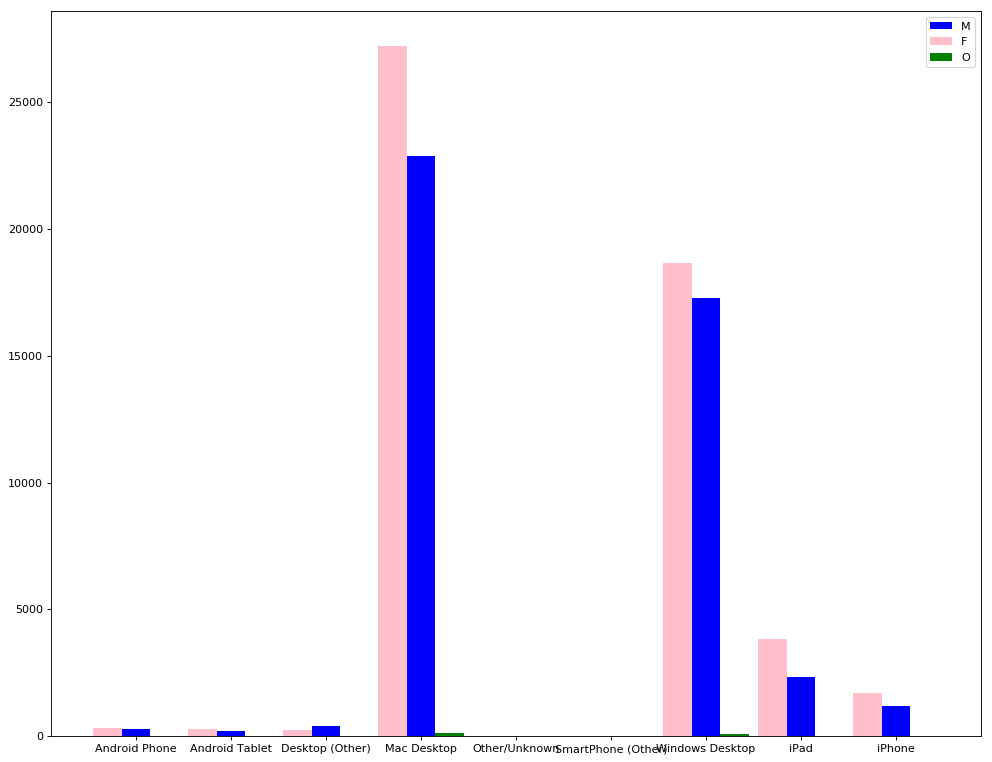

In [198]:
# age_counts.drop(30, inplace=True)
fdt = fdt_counts.index.tolist()
# turn it to np array so 
fdt = np.asarray(fdt)
x_index = np.asarray([1,2,3,4,5,6,7,8,9])

print fdt

width = 0.3
fig = plt.figure(num=None, figsize=(15, 12), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
rects1 = ax.bar(x_index, fdt_counts['MALE'],width, color='blue', label='M')
rects2 = ax.bar(x_index-width, fdt_counts['FEMALE'],width,color='pink', label='F')
rects3 = ax.bar(x_index+width, fdt_counts['OTHER'],width, color='green', label='O')

plt.xticks(x_index, fdt)
ax.legend()
plt.show()

Can be useful

## plot gender with first_browser

In [199]:
df_fb = pd.concat([df.gender, df.first_browser, df.id],axis=1)
fb_counts = df_fb.groupby(['first_browser','gender']).count()

calculate the total number of individual per age group:

In [200]:
fb_totals = fb_counts.sum(level=0)
print fb_totals

                       id
first_browser            
AOL Explorer           83
Android Browser       357
Apple Mail             19
Avant Browser           4
BlackBerry Browser     33
Camino                  4
Chrome              36298
Chrome Mobile         481
Chromium               42
CometBird               1
Comodo Dragon           1
CoolNovo                4
Firefox             17629
IE                   8985
IE Mobile               9
IceWeasel              10
Iron                    9
Kindle Browser          1
Maxthon                25
Mobile Firefox         14
Mobile Safari        8890
Mozilla                 2
NetNewsWire             1
Opera                  97
Opera Mini              2
Opera Mobile            2
PS Vita browser         1
Pale Moon               6
RockMelt               20
Safari              23980
SeaMonkey               2
Silk                   67
SiteKiosk               6
SlimBrowser             1
Sogou Explorer         12
Stainless               1
TenFourFox  

To prepare for plotting, I'll transform my counts dataframe to separate each sex by columns, instead of by index.

In [201]:
fb_counts = fb_counts.unstack(level=1)
fb_counts.columns = fb_counts.columns.droplevel(level=0)
print fb_counts

gender               FEMALE     MALE  OTHER
first_browser                              
AOL Explorer           49.0     34.0    NaN
Android Browser       207.0    149.0    1.0
Apple Mail             10.0      9.0    NaN
Avant Browser           2.0      2.0    NaN
BlackBerry Browser     20.0     13.0    NaN
Camino                  2.0      2.0    NaN
Chrome              17358.0  18860.0   80.0
Chrome Mobile         219.0    262.0    NaN
Chromium                6.0     36.0    NaN
CometBird               NaN      1.0    NaN
Comodo Dragon           1.0      NaN    NaN
CoolNovo                3.0      1.0    NaN
Firefox              9650.0   7929.0   50.0
IE                   5457.0   3515.0   13.0
IE Mobile               5.0      4.0    NaN
IceWeasel               3.0      7.0    NaN
Iron                    3.0      6.0    NaN
Kindle Browser          NaN      1.0    NaN
Maxthon                 5.0     20.0    NaN
Mobile Firefox          5.0      9.0    NaN
Mobile Safari        5450.0   34

In [202]:
fb_counts.shape

(40, 3)

replace the NaN by 0.

In [203]:
fb_counts = fb_counts.fillna(0)


insight: at age 30, weman are much more than man. age 30 can be a out liner?????

['AOL Explorer' 'Android Browser' 'Apple Mail' 'Avant Browser'
 'BlackBerry Browser' 'Camino' 'Chrome' 'Chrome Mobile' 'Chromium'
 'CometBird' 'Comodo Dragon' 'CoolNovo' 'Firefox' 'IE' 'IE Mobile'
 'IceWeasel' 'Iron' 'Kindle Browser' 'Maxthon' 'Mobile Firefox'
 'Mobile Safari' 'Mozilla' 'NetNewsWire' 'Opera' 'Opera Mini'
 'Opera Mobile' 'PS Vita browser' 'Pale Moon' 'RockMelt' 'Safari'
 'SeaMonkey' 'Silk' 'SiteKiosk' 'SlimBrowser' 'Sogou Explorer' 'Stainless'
 'TenFourFox' 'TheWorld Browser' 'Yandex.Browser' 'wOSBrowser']


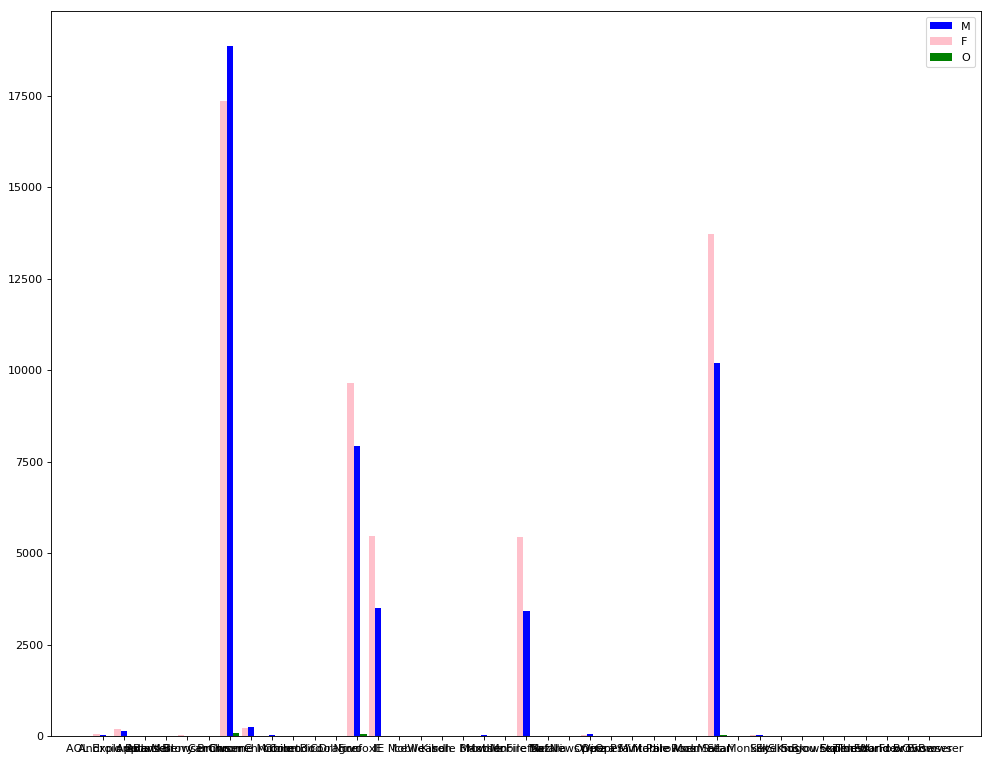

In [205]:
# age_counts.drop(30, inplace=True)
fb = fb_counts.index.tolist()
# turn it to np array so 
fb = np.asarray(fb)
x_index = np.asarray([1,2,3,4,5,6,7,8,9,10
                      ,11,12,13,14,15,16,17,18,19,20
                      ,21,22,23,24,25,26,27,28,29,30
                      ,31,32,33,34,35,36,37,38,39,40])

print fb

width = 0.3
fig = plt.figure(num=None, figsize=(15, 12), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
rects1 = ax.bar(x_index, fb_counts['MALE'],width, color='blue', label='M')
rects2 = ax.bar(x_index-width, fb_counts['FEMALE'],width,color='pink', label='F')
rects3 = ax.bar(x_index+width, fb_counts['OTHER'],width, color='green', label='O')

plt.xticks(x_index, fb)
ax.legend()
plt.show()

Can be useful

### Train a modle to get the the missing age
relavent feature can be: date_account_created signup_method signup_flow language affiliate_channel affiliate_provider first_affiliate_tracked signup_app first_device_type first_browser

In [9]:
df.drop(['id'],1,inplace=True)
gender_relat_data = df.dropna()
Y = gender_relat_data.gender
gender_relat_data.drop(['gender','date_account_created','country_destination'],1,inplace=True)


In [10]:
gender_relat_data.head()

timestamp_first_active   age signup_method  signup_flow language  \
1            2.010000e+13  38.0      facebook            0       en   
2            2.010000e+13  56.0         basic            3       en   
3            2.010000e+13  42.0      facebook            0       en   
6            2.010000e+13  46.0         basic            0       en   
7            2.010000e+13  47.0         basic            0       en   

  affiliate_channel affiliate_provider first_affiliate_tracked signup_app  \
1               seo             google               untracked        Web   
2            direct             direct               untracked        Web   
3            direct             direct               untracked        Web   
6             other         craigslist               untracked        Web   
7            direct             direct                     omg        Web   

  first_device_type first_browser  
1       Mac Desktop        Chrome  
2   Windows Desktop            IE  
3       Mac Desktop       Firefox  
6       Mac Desktop        Safari  
7       Mac Desktop        Safari

One hot encoding all age related data

In [11]:
oh_signup_method = pd.get_dummies(gender_relat_data.signup_method, prefix="signup_method")
oh_language = pd.get_dummies(gender_relat_data.language, prefix="language")
oh_signup_method = pd.get_dummies(gender_relat_data.signup_method, prefix="language")
oh_affiliate_channel = pd.get_dummies(gender_relat_data.affiliate_channel, prefix="affiliate_channel")
oh_affiliate_provider = pd.get_dummies(gender_relat_data.affiliate_provider, prefix="affiliate_provider")
oh_first_affiliate_tracked = pd.get_dummies(gender_relat_data.first_affiliate_tracked, prefix="first_affiliate_tracked")
oh_signup_app = pd.get_dummies(gender_relat_data.signup_app, prefix="signup_app")
oh_first_device_type = pd.get_dummies(gender_relat_data.first_device_type, prefix="first_device_type")
oh_first_browser = pd.get_dummies(gender_relat_data.first_browser, prefix="first_browser")
gender_relat_data.drop(['signup_method', 'signup_method', 'signup_flow',
         'language', 'affiliate_channel', 
         'affiliate_provider', 'first_affiliate_tracked', 
         'signup_app', 'first_device_type', 'first_browser'],1,inplace=True)
gender_relat_data = pd.concat([oh_signup_method,gender_relat_data,oh_language,oh_signup_method,
                      oh_affiliate_channel,oh_affiliate_provider,
                     oh_first_affiliate_tracked,oh_signup_app,
                     oh_first_device_type,oh_first_browser],axis=1)

In [12]:
# df_thirth =  gender_relat_data.loc[df['age']==30]
# df_thirth.shape

Sample scaling some rows for female that age 30

In [13]:
# thir_X = df_thirth.ix[:,:129]
# thir_Y = df_thirth.ix[:,129]
# # df = df.drop(df.query('gender == \'FEMALE\'').sample(frac=0.3).index)
# # df = df.drop(df.query('gender == \'FEMALE\' and age == 30').sample(frac=0.9).index)
# # df.shape
# nm1 = NearMiss(random_state=0, version =1)
# Xthir_resample,Ythir_resample = nm1.fit_sample(thir_X,thir_Y)

In [14]:
# Xthir_resample.shape

Train a model to predict age using SGDRegresion

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(gender_relat_data, Y, test_size=0.3)


In [26]:
from sklearn import tree
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
import seaborn as sn
result_lable = ['MALE','FEMALE','OTHER']

## DECISION TREE TO PREDICT GENDER

In [27]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy',min_samples_split=1000)
clf = clf.fit(x_train,y_train)

In [28]:
y_predict = clf.predict(x_test)
precision, recall, fscore, support = score(y_test, y_predict)
print('precision: {}'.format(precision))
print precision_score(y_test, y_predict, average='weighted') 
print accuracy_score(y_test, y_predict)

precision: [ 0.57867412  0.55399319  0.        ]
0.566247500696
0.570962759568


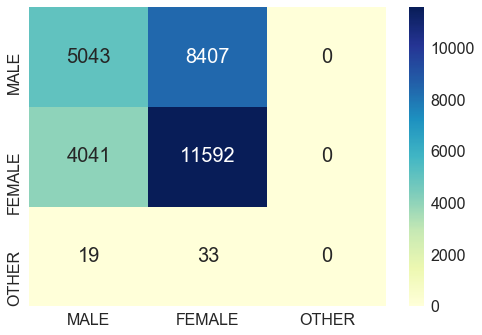

In [29]:
cnf_matrix = confusion_matrix(y_test, y_predict, labels = result_lable)
cnf_matrix = pd.DataFrame(cnf_matrix, index = [i for i in result_lable],
                          columns = [i for i in result_lable])
# Plot non-normalized confusion matrix
sn.set(font_scale=1.6)
sn.heatmap(cnf_matrix, annot= True,annot_kws={"size": 20}, cmap="YlGnBu",fmt="d")

## Radial Basis Function (RBF) kernel SVM

In [221]:
from sklearn.svm import SVC
svc = SVC(gamma=2, C=1)
svc.fit(x_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [222]:
y_predict = svc.predict(x_test)
precision, recall, fscore, support = score(y_test, y_predict)
print('precision: {}'.format(precision))
print precision_score(y_test, y_predict, average='weighted') 
print accuracy_score(y_test, y_predict)

precision: [ 0.575       0.52443062  0.00815217]
0.550342923587
0.550540586923


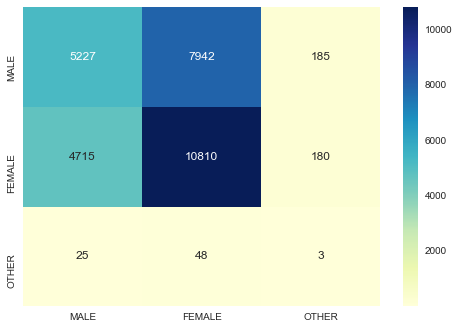

In [223]:
cnf_matrix = confusion_matrix(y_test, y_predict, labels = result_lable)
cnf_matrix = pd.DataFrame(cnf_matrix, index = [i for i in result_lable],
                          columns = [i for i in result_lable])
# Plot non-normalized confusion matrix
sn.heatmap(cnf_matrix, annot= True, cmap="YlGnBu",fmt="d")